# Flux contamination 2
## Physical model 

*Hannu Parviainen*<br>
*Edited: 1.1.2020*


### Introduction

The contamination model is aimed for simulating exoplanet transit light curves where the planet host star flux is "contaminated" by flux from nearby stars (also called blending). Contamination leads to a decrease in the observed transit depth (the planet appears to be smaller than it truly is), and this effect is achromatic if the host and the contaminant(s) are of different spectral type.

The physical contamination model `pytransit.contamination.SMContamination` offers a physically more accurate flux contamination model than `pytransit.contamination.BBContamination` based on stellar models by Husser et al (2013). The model spectra have been averaged over stellar metallicity and $\log g$, and downsampled to a lower resolution. The model is described in Parviainen et al. (2019).

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


### Import

In [2]:
from pytransit.contamination import SMContamination, Instrument, sdss_griz

### Initialisation

The model is initialised with a `pytransit.contamination.Instrument` that defines the passbands (filters). We'll set up a simple instrument with approzimate sloan *g'*, *r'*, *i'*, and *z* filters available as a set as `pytransit.contamination.sdss_griz`. The initialisation of `SMContamination`also requires the name of the reference passband, `ref_pb`, that has to correspond to one of the filter names in the instrument.

In [3]:
cn = SMContamination(Instrument('example', sdss_griz), ref_pb="r'")

### Usage

After the initialisation, the contamination ratio can be calculated using `SMContamination.contamination`, that takes the contamination in the reference passband (`cref`), the effective temperature of the host (`teff1`), and the effective temperature of the contaminant (`teff2`).

In this example, we have four passbands, and we have chosen *r'* as the reference passband. We calculate the contamination in the other passbands assuming a host with $T_\mathrm{Eff} = 4400\,\mathrm{K}$ and a contaminant with $T_\mathrm{Eff} = 6200\,\mathrm{K}$.

In [4]:
cn.contamination(0.25, 4400, 6200)

array([0.40574647, 0.25      , 0.205833  , 0.18273768])

### Plotting the model

The relative stellar spectra and the resulting contamination can be plotted as a function of wavelength using `SMContamination.plot`.

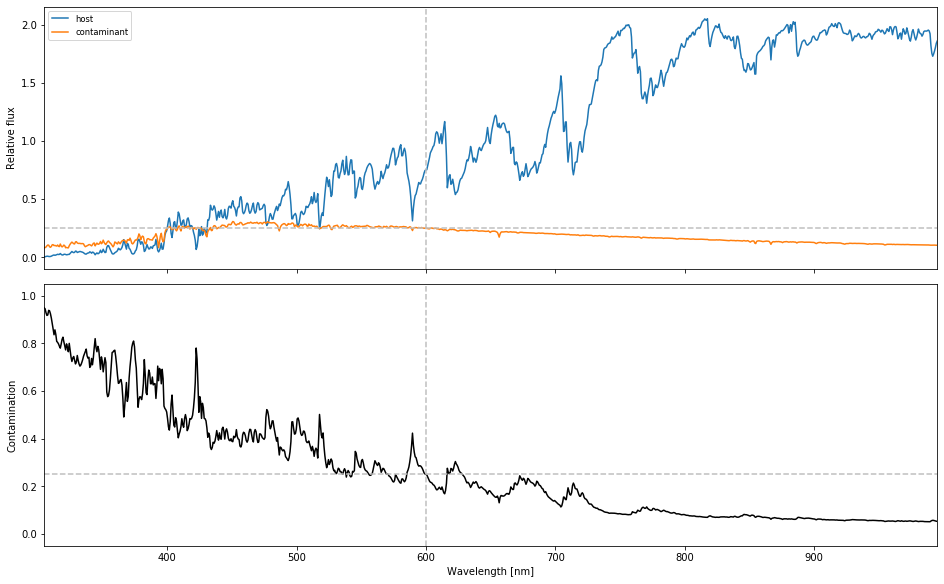

In [5]:
fig = cn.plot(3500, 5800, 0.25, nwl=1000, figsize=(13,8));

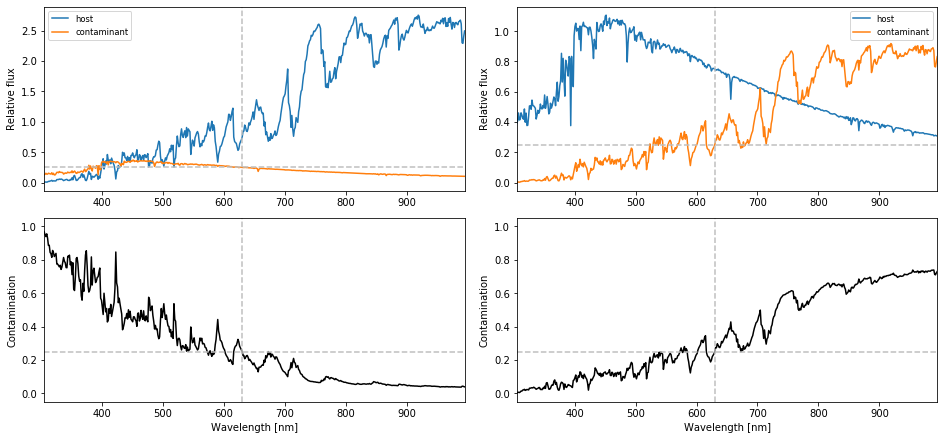

In [9]:
fig, axs = subplots(2, 2, figsize=(13,6), constrained_layout=True)
cn.plot(3400, 6200, 0.25, wlref=630, axs=axs[:,0])
cn.plot(6200, 3400, 0.25, wlref=630, axs=axs[:,1])

---

<center>©2020 Hannu Parviainen</center>